In [27]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


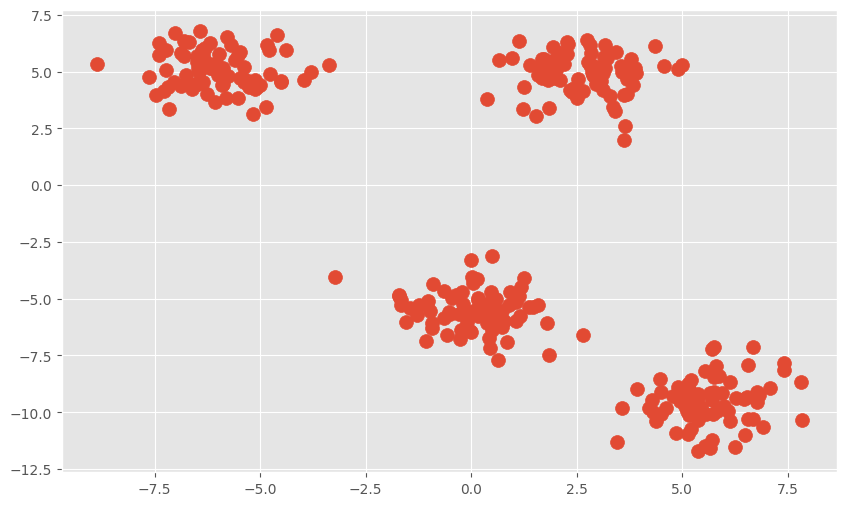

In [3]:
from sklearn.datasets._samples_generator import make_blobs
x , y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=10)
plt.figure(figsize=(10,6))
plt.scatter(x[:, 0], x[:, 1], s=100);

In [4]:
import cv2 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [5]:
import numpy as np 
compactness , labels, centers = cv2.kmeans(x.astype(np.float32), 4, None, criteria, 10, flags)

In [6]:
compactness

526.6774351084605

High compactness Score : Indicates all points close to their cluster centers

Low compactness Score  : Indicates diffrent clusters might not be well separated

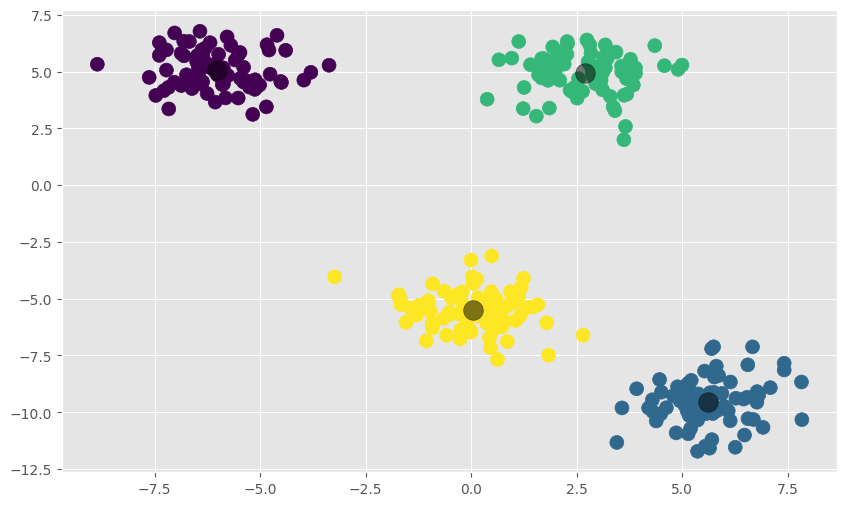

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c = labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [8]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def find_clusters(X, n_cluster, rseed=5):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_cluster]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
        for i in range(n_cluster)])
        if np.all(centers == new_centers):
            break
        centers =new_centers

    return centers, labels

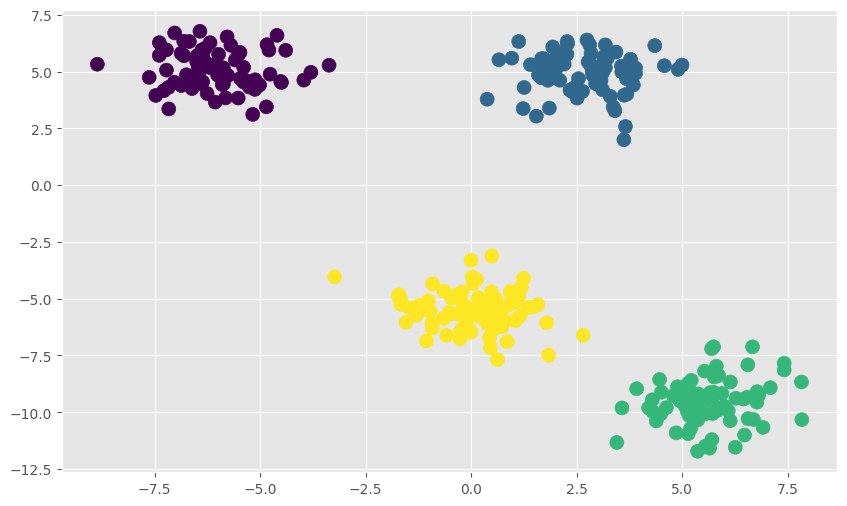

In [10]:
centers , labels = find_clusters(x, 4)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =labels, s=100);

First Caveat :we must select number of clusters beforehand , Expectation_maximization step improves result in each step

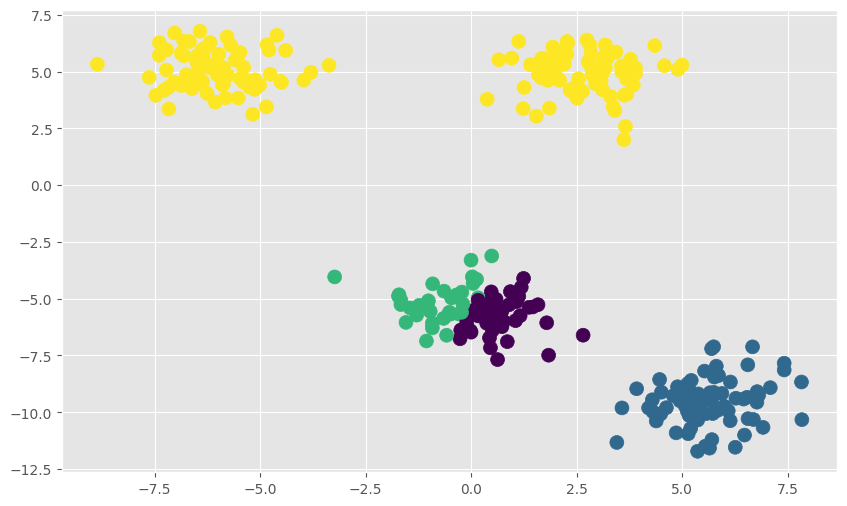

In [12]:
centers , labels = find_clusters(x, 4,rseed=10)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =labels, s=100);

Second Caveat  : we must select number of clusters beforehand

In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness , labels, centers = cv2.kmeans(x.astype(np.float32), 6, None, criteria, 10, flags)


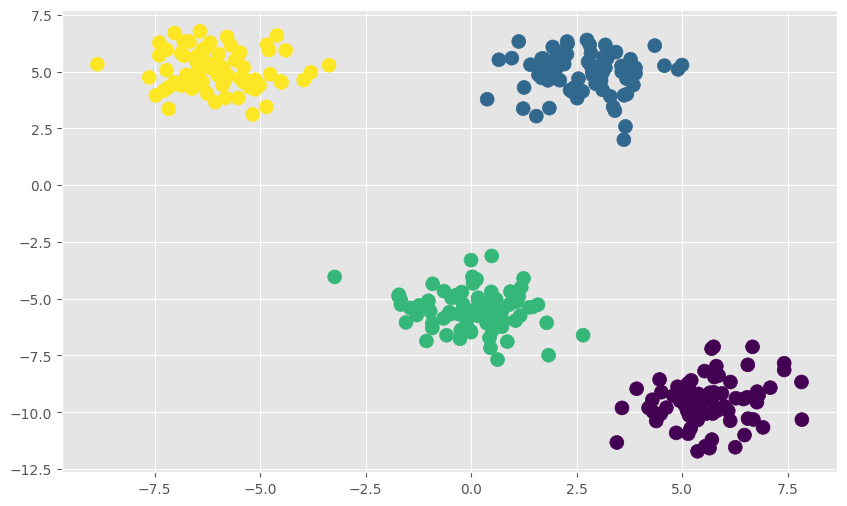

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =y_true, s=100);

In [15]:
kvals = np.arange(2, 10)
compactness = []
for k in kvals:
    c,_, _ =cv2.kmeans(x.astype(np.float32), k, None, criteria, 10, flags)
    compactness.append(c)

Text(0, 0.5, 'compactness')

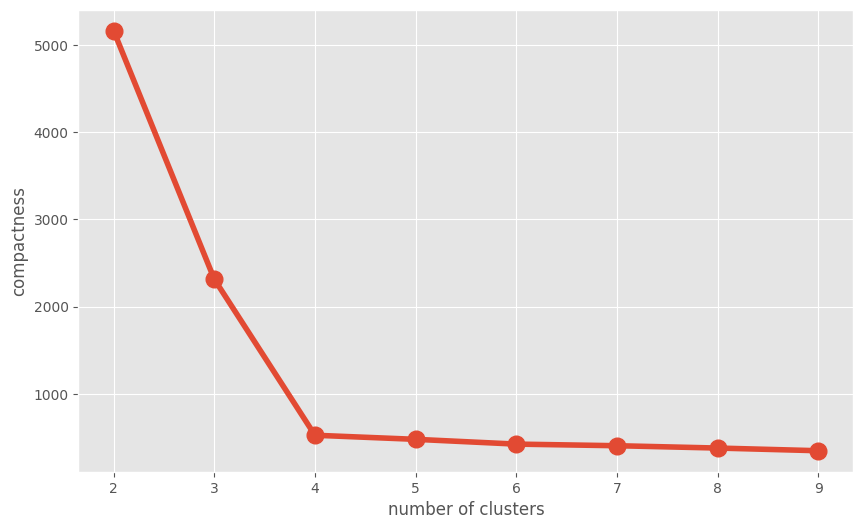

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(kvals, compactness, 'o-', linewidth=4, markersize=12);
plt.xlabel('number of clusters')
plt.ylabel('compactness')

In [21]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=12)

In [22]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness , labels, centers = cv2.kmeans(x.astype(np.float32), 6, None, criteria, 10, flags)

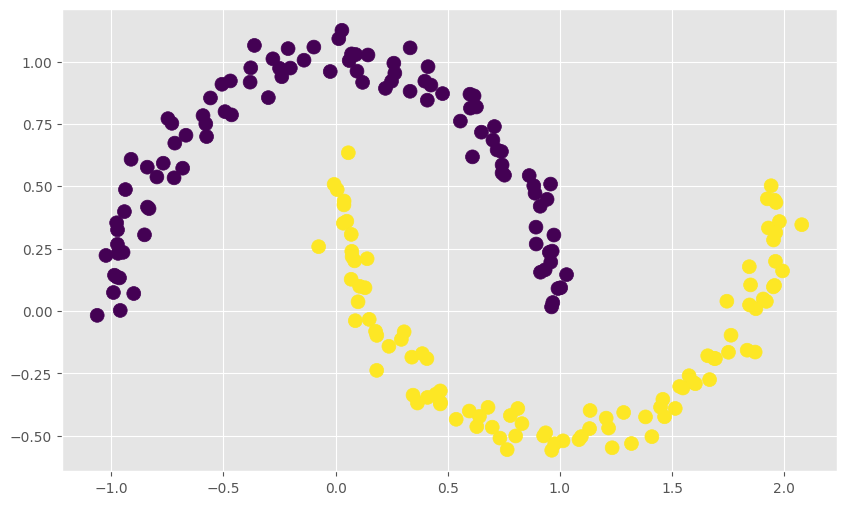

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =y, s=100);

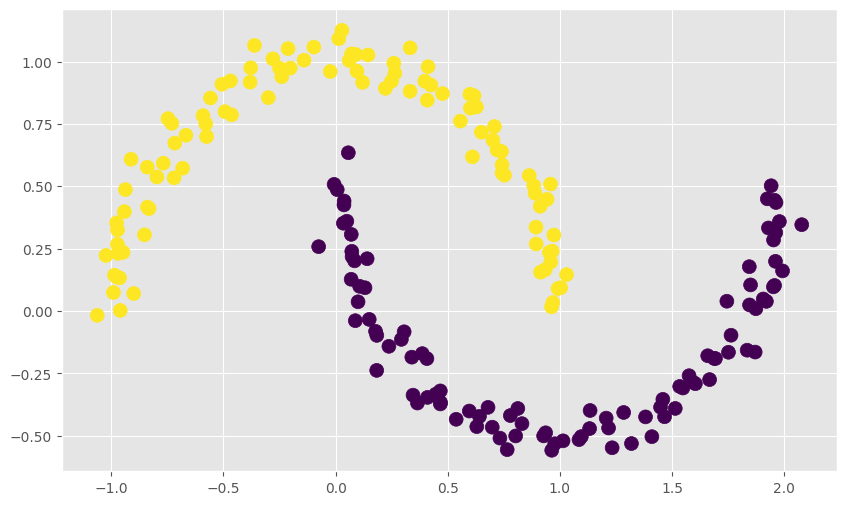

In [26]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =labels, s=100);